<font color='Black' size=6 align='center'><p style='text-align: center;'>**Supporting Information**\
<font color='Black' size=6 align='center'><p style='text-align: center;'>**Supervised Classification of Preeclampsia Clinical Cases by Dataset from MALDI-TOF-MS using Machine Learning tools**\
<font color='Black' size=5><p style='text-align:'>Luisa F. Amezquita<sup>1</sup>, Laura C. Maca<sup>2</sup>, Yuly A. Prada<sup>3</sup>, Claudia C. Colmenares<sup>4</sup>, Doris C. Quintero<sup>4</sup>, Paula K. Bautista-Niño<sup>4</sup>, Norma C. Serrano<sup>4</sup>, Enrique Mejía-Ospino<sup>3</sup>
    
<p style="color: black; font-size: 20px; line-height: 0.5;">
    <sup>1</sup>Universidad Pedagógica y Tecnológica de Colombia (UPTC), Tunja, Colombia
</p>
<p style="color: black; font-size: 20px; line-height: 0.5;">
    <sup>2</sup>Universidad del Cauca, Popayán, Colombia
</p>
<p style="color: black; font-size: 20px; line-height: 0.5;">
    <sup>3</sup>Laboratorio de Espectroscopia Atómica y Molecular (LEAM). Parque Tecnológico Guatiguará
    Universidad Industrial de Santander. Piedecuesta, Santander, Colombia.
</p>
<p style="color: black; font-size: 20px; line-height: 0.5;">
    <sup>4</sup>Research Centre, Fundación Cardiovascular de Colombia (FCV),
    Hospital Internacional de Colombia, Valle de Menzuly Km 7, Piedecuesta, Santander, Colombia
</p>
    
<font color='Black' size=5><p style='text-align:'>The Supporting Information is available free of charge at Access to Jupyter Notebook:
---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, Normalizer
scaler=StandardScaler()
norma=Normalizer()
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
from google.colab import drive


In [3]:
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
fn = []
all_data3 = pd.DataFrame()

for f in glob.glob("/gdrive/MyDrive/Modelo predictivo preeclampsia (1)/ESPECTROS txt /*.txt"):
    df = pd.read_csv(f, header=None, delimiter=' ')
    all_data3 = pd.concat([all_data3, df], axis=1)
    fn.append(f)
Datamz = all_data3[0] # m/z ratios
Data = all_data3[1] # Intensity
Data.columns=range(Data.shape[1]) # Here we put ordered indexes to the column of intensities
#Datamz.columns=range(Datamz.shape[1])
#Datamz=Data[[0]]
Datamz.tail(194048) #
Datamz = all_data3[0]
Data = all_data3.drop(0, axis=1)
Dsna=Datamz[0:194048]
D=Dsna.isnull().any()
df = D[D[0]==True]
Dataint=Data[0:194048]

In [5]:
ET= pd.read_excel('/gdrive/MyDrive/Modelo predictivo preeclampsia (1)/etiquetas.xlsx',header=None)
Y1=ET.set_axis(['Clase'], axis=1)
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = OrdinalEncoder()
encoder.fit(Y1[['Clase']])
Y1_code = encoder.transform (Y1[['Clase']])
Y1_code = pd.DataFrame(Y1_code)

In [6]:
scaler.fit(Dataint) # calculate the average in order to make the transformation
x_scaled=scaler.transform(Dataint)# Now yes, I scale the data and normalize it.
x_norm = preprocessing.normalize(Dataint, norm='l1')
x_scaled = scaler.fit_transform(Dataint)
pca = PCA(n_components=8)  # Number of major components to be maintained
pca1=pca.fit(x_scaled.T)
datos_pca = pca.fit_transform(x_scaled.T)

In [7]:
from scipy.stats import ttest_ind
# Separate data into two groups (positive and negative) according to labels
datos_positivos = x_scaled.T[Y1_code[0] == 1]
datos_negativos = x_scaled.T[Y1_code[0] == 0]
t_statistic, p_value = ttest_ind(datos_positivos, datos_negativos)
# Calculate average peak profiles
perfil_positivo_promedio = datos_positivos.mean(axis=0)
perfil_negativo_promedio = datos_negativos.mean(axis=0)

In [17]:
E=np.loadtxt('/gdrive/MyDrive/Modelo predictivo preeclampsia (1)/ESPECTROS txt /143.txt') #this spectrum corresponds to a control
O=np.loadtxt('/gdrive/MyDrive/Modelo predictivo preeclampsia (1)/ESPECTROS txt /101.txt') #this spectrum corresponds to a case
I= E[:, 0]
m= E[:, 1]
p= O[:, 0]
n= O[:, 1]

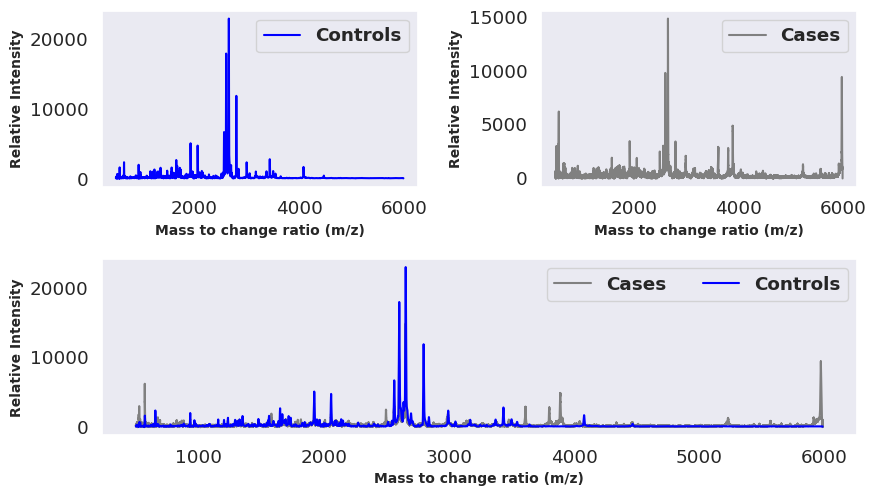

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [70]:
from google.colab import files
plt.figure(figsize=(9, 5))

# Graph for the positive group
plt.subplot(2, 2, 1)
plt.plot(I,m, label='Controls', color='blue')
plt.legend( fontsize=14,prop={'weight':'bold'})
plt.grid()
plt.xlabel("Mass to change ratio (m/z)", fontweight='bold', fontsize=10)
plt.ylabel("Relative Intensity", fontweight='bold', fontsize=10)

# Chart for negative group
plt.subplot(2, 2, 2)
plt.plot(p,n, label='Cases', color='gray')
plt.legend(prop={'weight':'bold'},title_fontsize=14)
plt.grid()
plt.xlabel("Mass to change ratio (m/z)", fontweight='bold', fontsize=10)
plt.ylabel("Relative Intensity", fontweight='bold', fontsize=10)

# Overlay graphic
plt.subplot(2, 1, 2)
plt.plot(p,n, label='Cases', color='gray')
plt.plot(I,m, label='Controls', color='blue')

plt.legend(ncol=2,fontsize=14,prop={'weight':'bold'})
plt.grid()
# Adjust the spacing between graphics
plt.tight_layout()
plt.xlabel("Mass to change ratio (m/z)", fontweight='bold', fontsize=10)
plt.ylabel("Relative Intensity", fontweight='bold', fontsize=10)

plt.show()

plt.savefig("imagen_1.tiff", format='tiff', dpi=600)
plt.close()

# Download images
files.download("imagen_1.tiff")


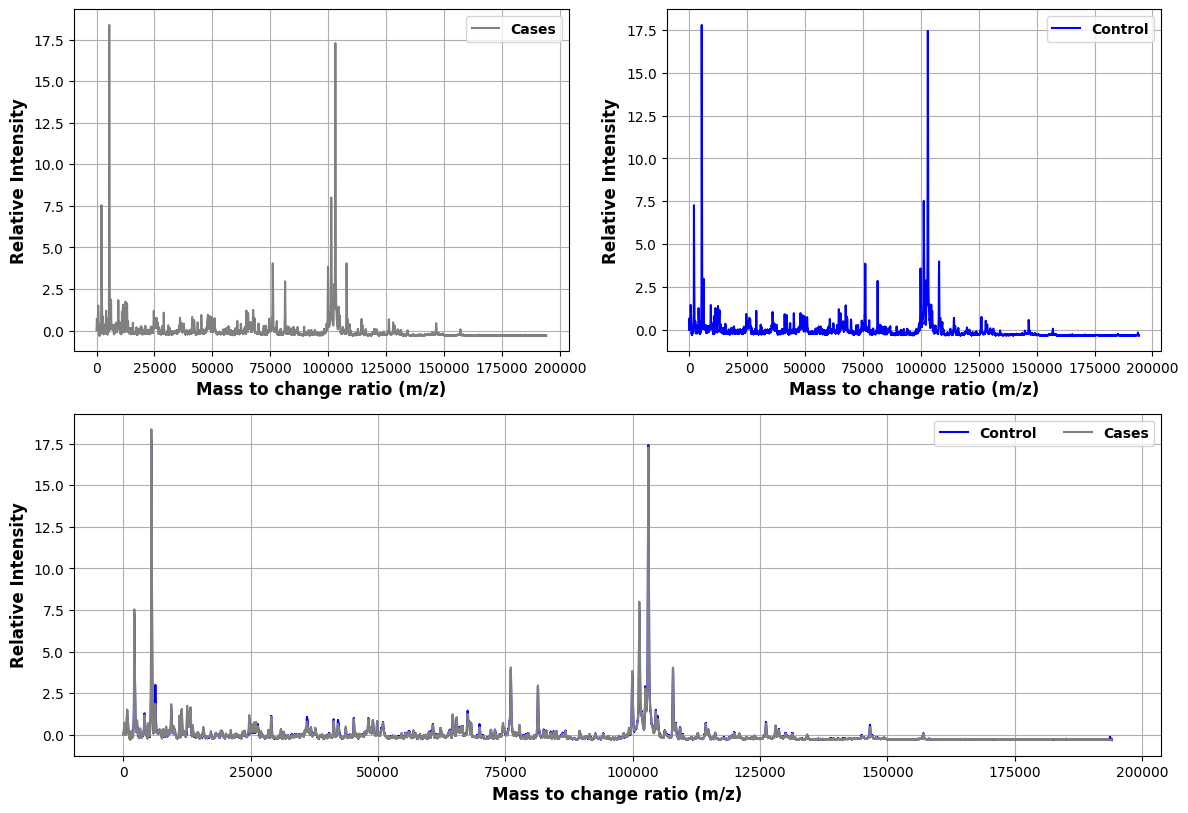

In [26]:
plt.figure(figsize=(12, 8))

# Graph for the positive group
plt.subplot(2, 2, 1)
plt.plot(perfil_positivo_promedio, label='Cases', color='gray')
plt.legend( fontsize=14,prop={'weight':'bold'})
plt.grid()
plt.xlabel("Mass to change ratio (m/z)", fontweight='bold', fontsize=12)
plt.ylabel("Relative Intensity", fontweight='bold', fontsize=12)

# Chart for negative group
plt.subplot(2, 2, 2)
plt.plot(perfil_negativo_promedio, label='Control', color='blue')
plt.legend(prop={'weight':'bold'},title_fontsize=14)
plt.grid()
plt.xlabel("Mass to change ratio (m/z)", fontweight='bold', fontsize=12)
plt.ylabel("Relative Intensity", fontweight='bold', fontsize=12)

# Overlay graphic
plt.subplot(2, 1, 2)
plt.plot(perfil_negativo_promedio, label='Control', color='blue')
plt.plot(perfil_positivo_promedio, label='Cases', color='gray')

plt.legend(ncol=2,fontsize=14,prop={'weight':'bold'})
plt.grid()
# Adjust the spacing between graphics
plt.tight_layout()
plt.xlabel("Mass to change ratio (m/z)", fontweight='bold', fontsize=12)
plt.ylabel("Relative Intensity", fontweight='bold', fontsize=12)

# Show the figure
plt.show()


Varianza explicada: [0.34742797 0.12858195 0.10524784 0.06387451 0.05781439 0.04823655
 0.03098284 0.02311499]
Suma de varianza explicada: 0.8052810314671908


<ipython-input-27-65f8f5ba3ec9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=np.arange(1, len(expl) + 1), y=expl, palette="viridis")


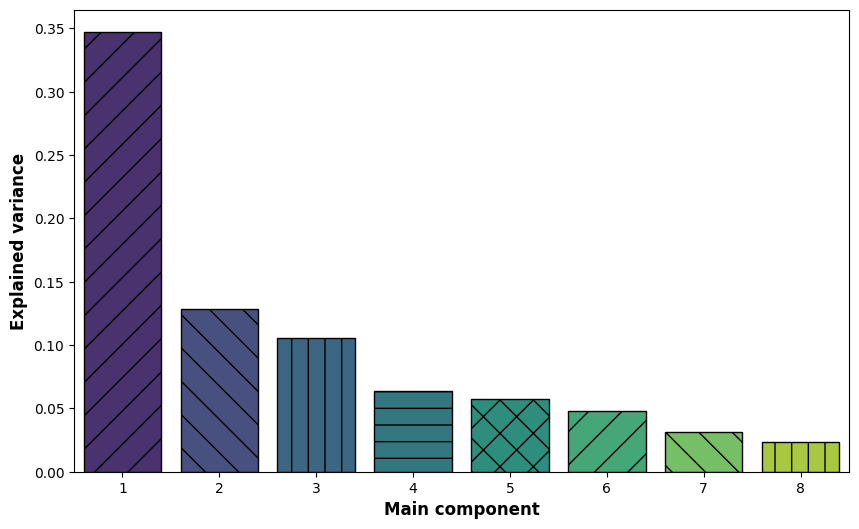

In [27]:
import seaborn as sns
# Carrying out the PCA
pca = PCA(n_components=8)
pca1 = pca.fit(x_scaled.T)
datos_pca = pca.transform(x_scaled.T)

# Obtain the explained variance
expl = pca.explained_variance_ratio_
print("Varianza explicada:", expl)
print("Suma de varianza explicada:", sum(expl))

# Create a DataFrame with PCA data and labels
datos_pca_df = pd.DataFrame(datos_pca, columns=[f"PC{i+1}" for i in range(datos_pca.shape[1])])
datos_pca_df = pd.concat([datos_pca_df, Y1], axis=1)

# Customize the Gantt chart
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=np.arange(1, len(expl) + 1), y=expl, palette="viridis")

# Add line patterns and colors
hatches = ['/', '\\', '|', '-', 'x']
for i, bar in enumerate(bars.patches):
    bar.set_hatch(hatches[i % len(hatches)])
    bar.set_edgecolor("black")

plt.xlabel("Main component",fontweight='bold',fontsize=12)
plt.ylabel("Explained variance",fontweight='bold',fontsize=12)
plt.show()

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.lines import Line2D
import pandas as pd
from google.colab import files

# Code for the first image
num_components = 8
pca = PCA(n_components=num_components)
pca.fit(x_scaled.T)
datos_pca = pca.transform(x_scaled.T)

componente_columns = [f"Component Principal {i+1}" for i in range(num_components)]
datos_pca_df = pd.DataFrame(datos_pca, columns=componente_columns)
datos_pca_df["Clase"] = Y1["Clase"]




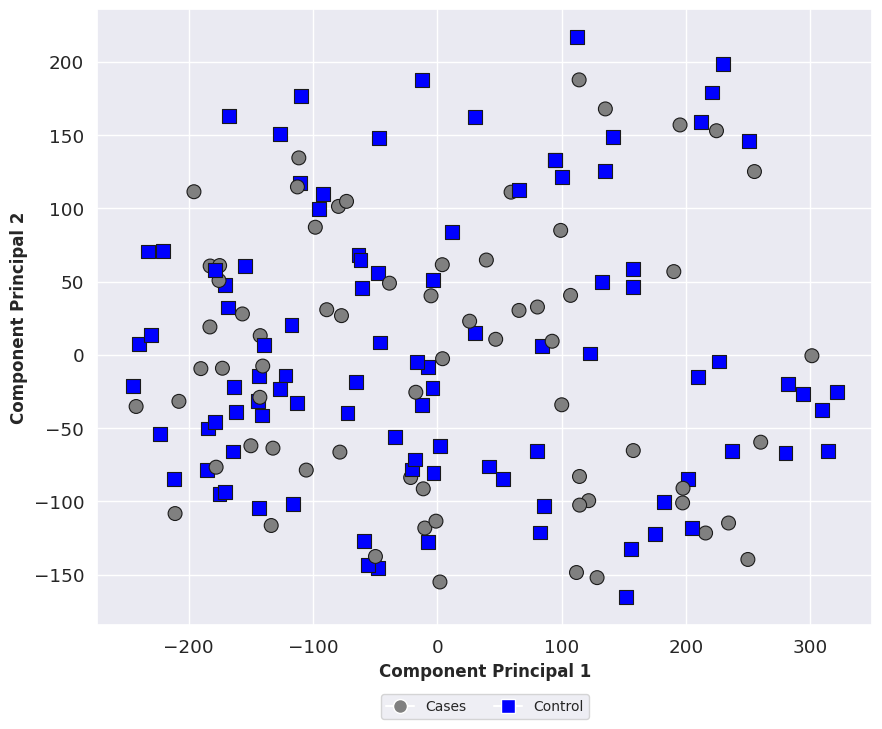

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.lines import Line2D

# Perform the PCA with 8 main components
num_components = 8
pca = PCA(n_components=num_components)
pca.fit(x_scaled.T)
datos_pca = pca.transform(x_scaled.T)

# Create a DataFrame with PCA data and labels
componente_columns = [f"Component Principal {i+1}" for i in range(num_components)]
datos_pca_df = pd.DataFrame(datos_pca, columns=componente_columns)
datos_pca_df["Clase"] = Y1["Clase"]  # Add the class column again

plt.figure(figsize=(10, 8))

scatter = sns.scatterplot(x="Component Principal 1", y="Component Principal 2", data=datos_pca_df,
                          hue="Clase", style="Clase", markers=["s", "o"], s=100,
                          palette={"si": "gray", "no": "blue"}, edgecolor='k')

legend_labels = ["Cases", "Control"]
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cases', markerfacecolor='gray', markersize=10),
                   Line2D([0], [0], marker='s', color='w', label='Control', markerfacecolor='blue', markersize=10)]

legend = plt.legend(title="", handles=legend_elements, labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize=10)

plt.xlabel("Component Principal 1", fontweight='bold', fontsize=12)
plt.ylabel("Component Principal 2", fontweight='bold', fontsize=12)

sns.set_style("whitegrid")

plt.show()
plt.savefig("imagen_2.tiff", format='tiff', dpi=600)
plt.close()

# Download images
files.download("imagen_2.tiff")


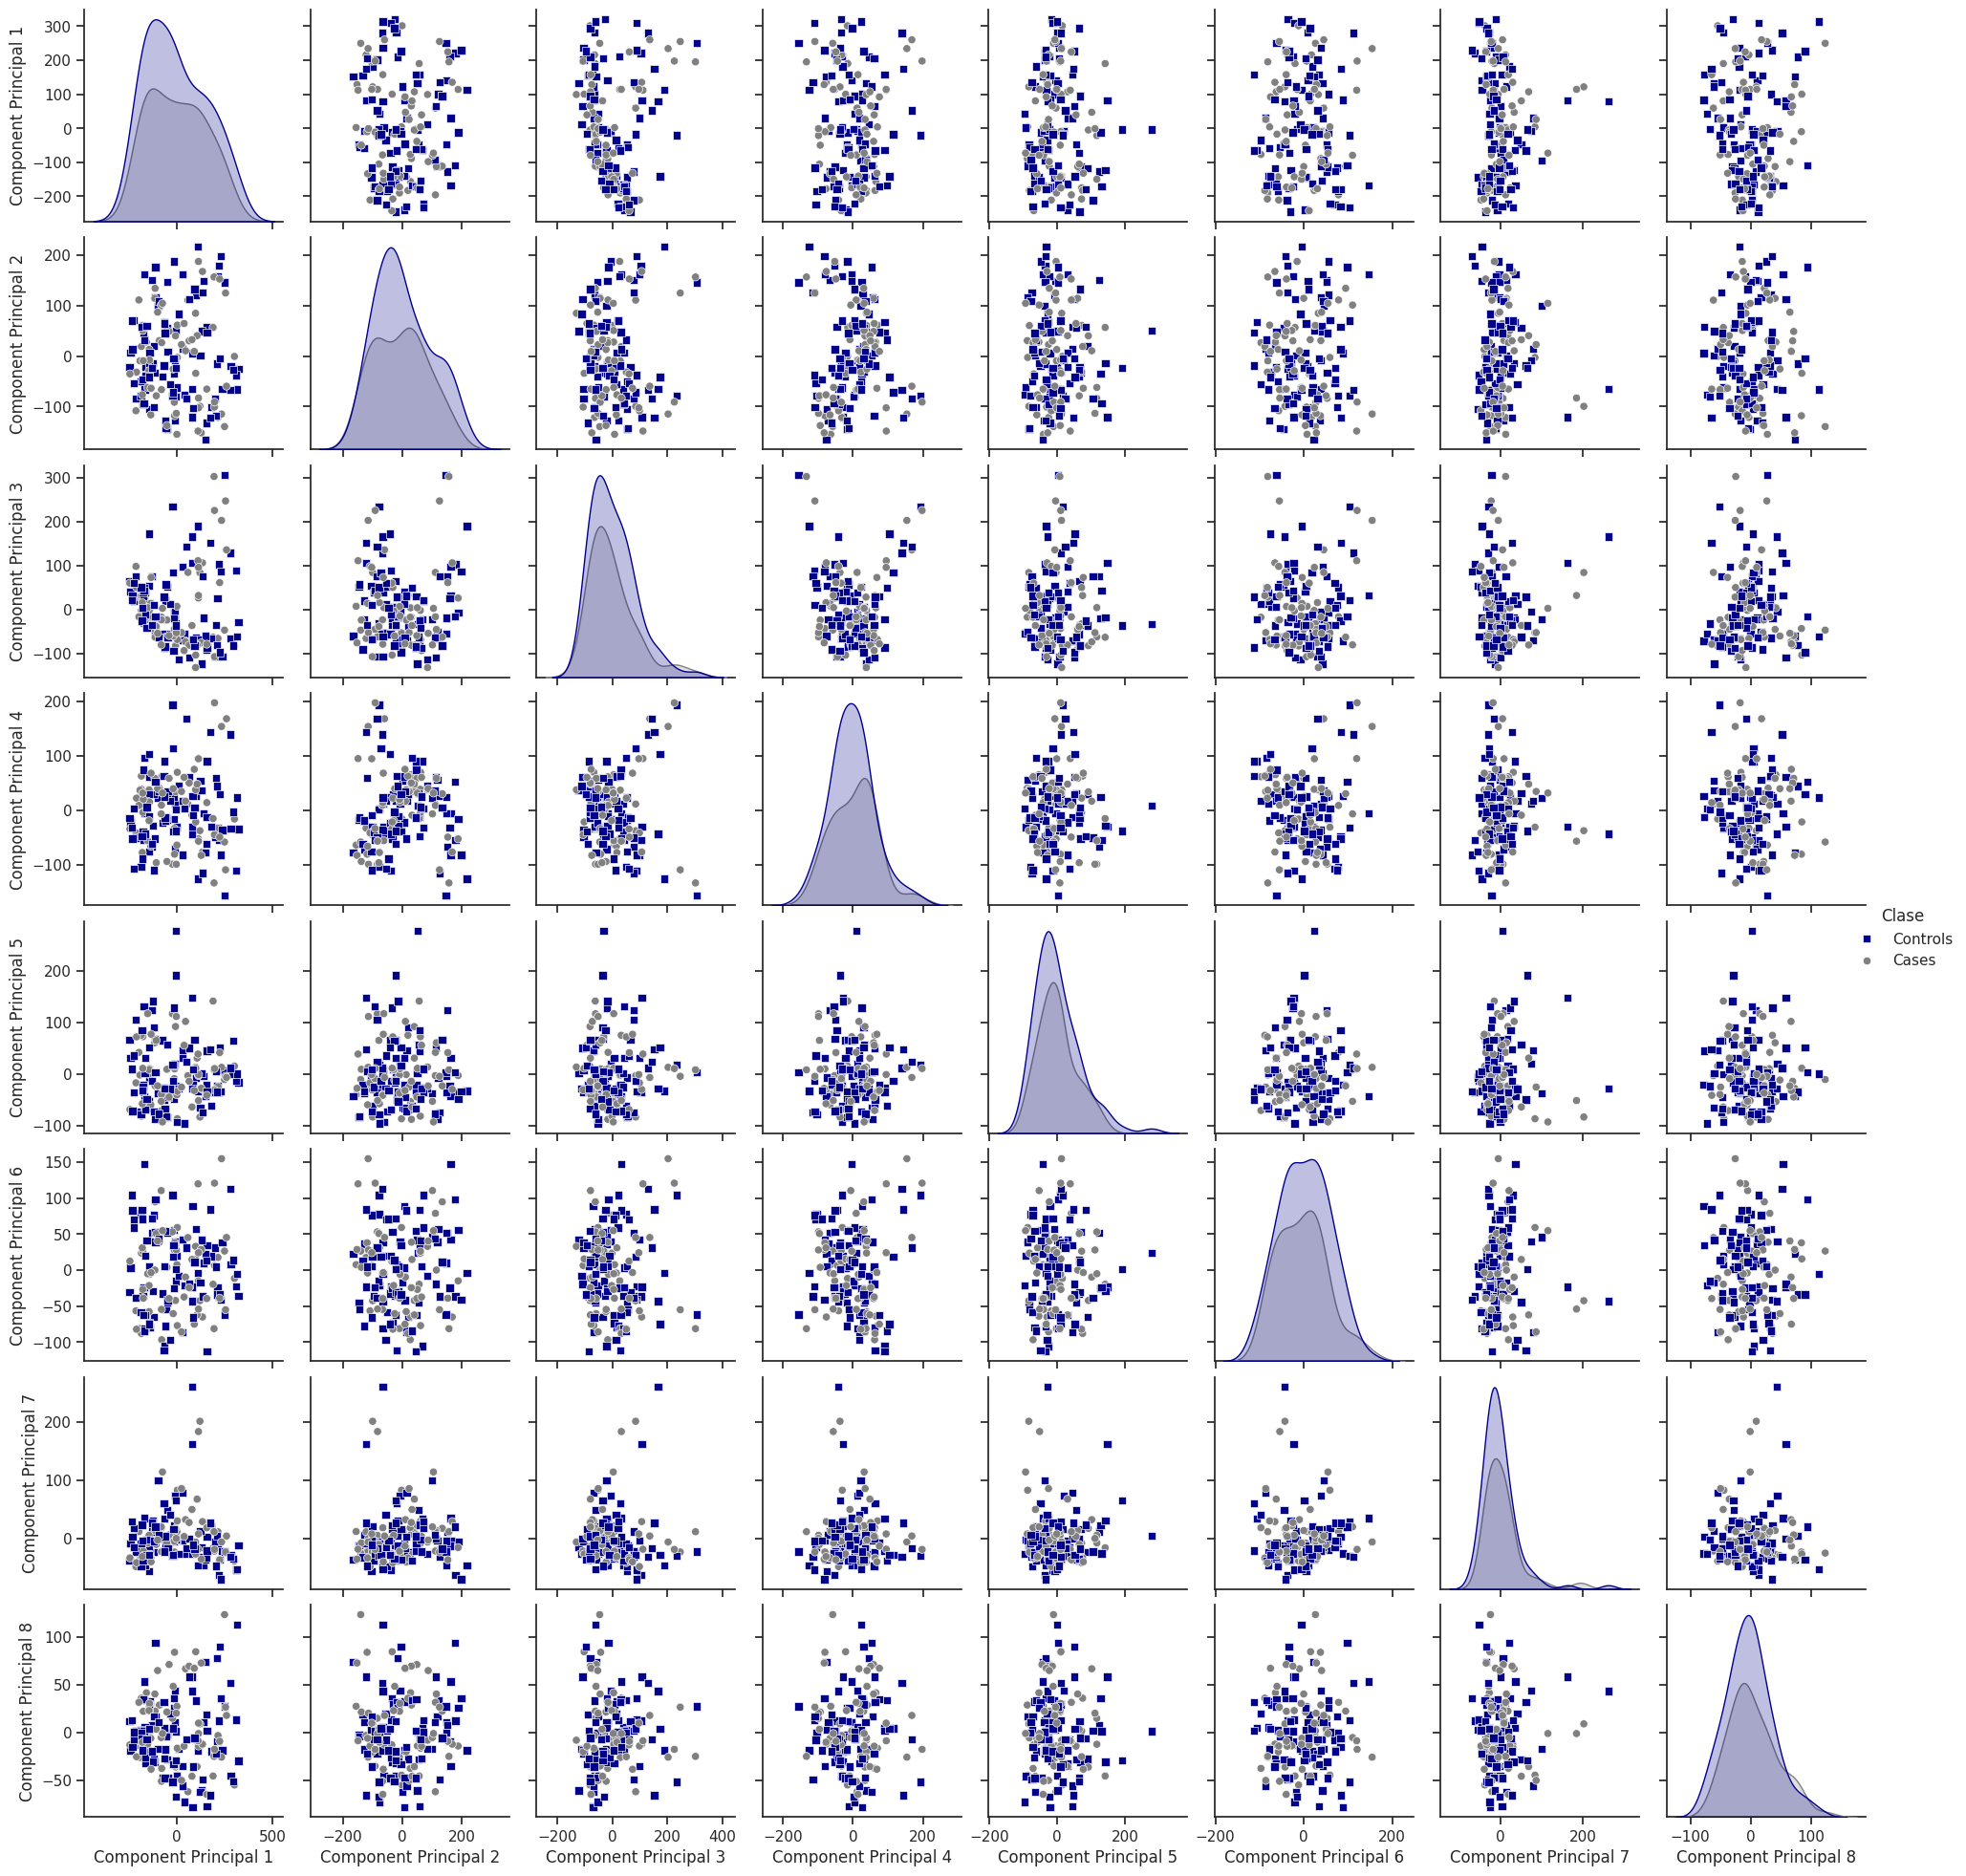

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Define a custom color palette with darker colors
custom_palette = {"no": "#00008B", "si": "#808080"}  # dark blue and gray

# Creates a pair diagram using the custom color palette
sns.set(style="ticks")
pairplot = sns.pairplot(datos_pca_df, hue="Clase", palette=custom_palette, markers=["s", "o"])

# Modify the legends of the graphic
legend_labels = ["Controls", "Cases"]
for t, l in zip(pairplot._legend.texts, legend_labels):
    t.set_text(l)

# Shows the pair diagram
plt.show()

# Download images (if you are using Google Colab, for example)

pairplot.savefig("imagen_3DP.tiff")
files.download("imagen_3DP.tiff")



In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

def opt_classifier(X, y, x_test, rs, model_type='svm'):
    if model_type == 'svm':
        # Using the SVM model
        classifier = SVC(C=40, kernel='rbf', random_state=123)
    elif model_type == 'logistic':
        # Using the Logistic Regression model
        classifier = LogisticRegression(C=1.0, random_state=123)
    else:
        raise ValueError("model_type debe ser 'svm' o 'logistic'")

    classifier.fit(X, y)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred, normalize=True)

    return (y_pred, accuracy)

# We tested with 30 components
exs_svm = []
yps_svm = []
exs_logistic = []
yps_logistic = []
rss = np.arange(115311, 115314)

for rs in rss:
    x_train, x_test, y_train, y_test = train_test_split(datos_pca, Y1_code.values.ravel(), train_size=0.8, random_state=rs, shuffle=True)

    # SVM
    y_pred_svm, ex_svm = opt_classifier(x_train, y_train, x_test, rs, model_type='svm')
    yps_svm.append(y_pred_svm)
    exs_svm.append(ex_svm)

    # Logistic Regression
   # y_pred_logistic, ex_logistic = opt_classifier(x_train, y_train, x_test, rs, model_type='logistic')
    # yps_logistic.append(y_pred_logistic)
    # exs_logistic.append(ex_logistic)
max_accuracy_svm = max(exs_svm)
rs_max_svm = rss[exs_svm.index(max_accuracy_svm)]

print("SVM - Mejor precisión:", max_accuracy_svm, "con random_state:", rs_max_svm)


SVM - Mejor precisión: 0.8787878787878788 con random_state: 115313


In [40]:
x_train, x_test, y_train, y_test = train_test_split(datos_pca, Y1_code.values.ravel(), train_size   = 0.8, random_state = 115313, shuffle = True)

svc1 = SVC(C = 40, kernel = 'rbf', random_state=115313)
svc1.fit(x_train, y_train)
y_pred_svc = svc1.predict(x_test)
ex_svc = accuracy_score(y_true = y_test, y_pred = y_pred_svc, normalize = True)
ex_svc

0.8787878787878788

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate the confusion matrix
confusion = confusion_matrix(y_true=y_test, y_pred=y_pred_svc)
print("Matriz de Confusión:")
print(confusion)

# Generates the classification report
report = classification_report(y_true=y_test, y_pred=y_pred_svc)
print("\nReporte de Clasificación:")
print(report)

Matriz de Confusión:
[[18  3]
 [ 1 11]]

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90        21
         1.0       0.79      0.92      0.85        12

    accuracy                           0.88        33
   macro avg       0.87      0.89      0.87        33
weighted avg       0.89      0.88      0.88        33



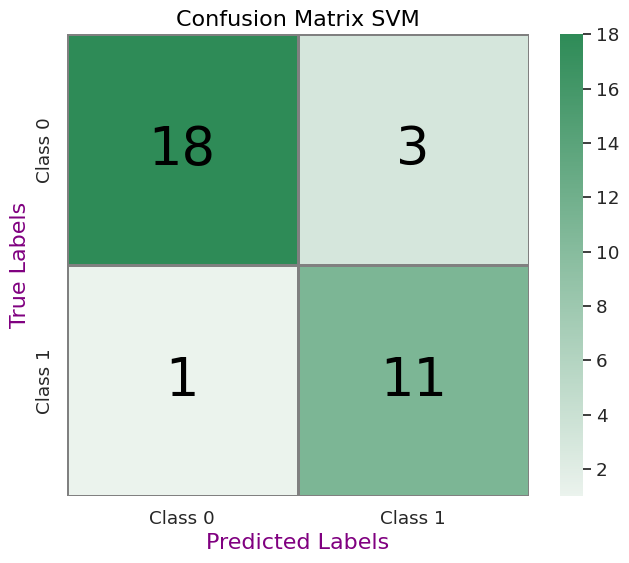

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_true = y_test  # Where y_test are the true labels of your test set
y_pred = y_pred_svc

# Obtain the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Custom colors
cmap = sns.light_palette("seagreen", as_cmap=True)

# Create a heat map with Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajusta el tamaño de la fuente

# Adjusts font size and other text attributes within the matrix
annot_kws = {"size": 38, "color": "black"}

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True, square=True,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'], linewidths=1, linecolor='gray',
            annot_kws=annot_kws)  # Apply the settings of annot_kws

plt.xlabel('Predicted Labels', fontsize=16, color='purple')
plt.ylabel('True Labels', fontsize=16, color='purple')
plt.title('Confusion Matrix SVM', fontsize=16, color='black')

plt.show()

plt.savefig("Matriz de Confusión SVM.tiff", format='tiff', dpi=600)
plt.close()

# Download images
files.download("Matriz de Confusión SVM.tiff")



In [45]:
# Fit the SVM model to your training data
svc1.fit(x_train, y_train)

# Obtains the support vectors
support_vectors = svc1.support_vectors_

<ipython-input-65-3b94b4254cf5>:22: UserWarning: The following kwargs were not used by contour: 'label'
  contour = plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.2, label='Classification Regions')  # Color the regions between the decision lines


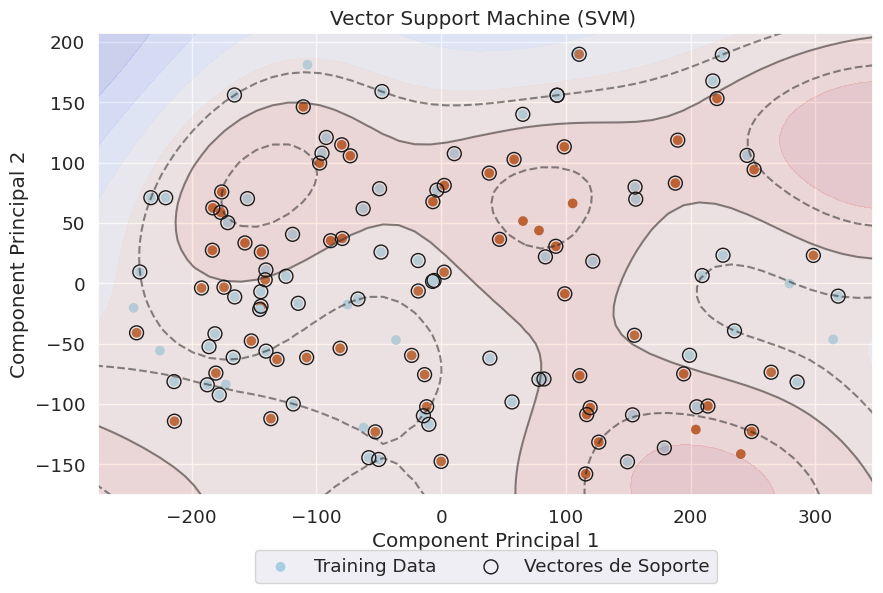

In [65]:
# Create an SVM model with the appropriate parameters
svc = SVC(C=40, kernel='rbf', random_state=23924)
pca = PCA(n_components=2)
x_train_reduced = pca.fit_transform(x_train)

# Create an SVM model with the appropriate parameters
svc = SVC(C=40, kernel='rbf', random_state=13028)
svc.fit(x_train_reduced, y_train)


# Graph of 2D training data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x_train_reduced[:, 0], x_train_reduced[:, 1], c=y_train, cmap=plt.cm.Paired, marker='o', label='Training Data')

# Draw the colored regions between the decision lines.
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
contour = plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.2, label='Classification Regions')  # Color the regions between the decision lines

# Draw 2D decision hyperplane
Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Highlight all support vectors and add the following legend
support_vectors = svc.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k', label='Vectores de Soporte')

# Add captions for the elements and place the caption in the upper left corner
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

plt.title('Vector Support Machine (SVM) ')
plt.xlabel('Component Principal 1')
plt.ylabel('Component Principal 2')
plt.show()

In [73]:
from sklearn.linear_model import LogisticRegression

# Split of data
x_train, x_test, y_train, y_test = train_test_split(datos_pca, Y1_code.values.ravel(), train_size=0.8, random_state=63645, shuffle=True)

# Creation of the Logistic Regression model
logistic_model = LogisticRegression(C=0.1, random_state=63645)
logistic_model.fit(x_train, y_train)
y_pred_logistic = logistic_model.predict(x_test)

# Calculate the accuracy
ex_logistic = accuracy_score(y_true=y_test, y_pred=y_pred_logistic, normalize=True)

print("Precisión de Regresión Logística:", ex_logistic)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)
class_report = classification_report(y_test, y_pred)
print("Informe de Clasificación:")
print(class_report)



Precisión de Regresión Logística: 0.7878787878787878
Matriz de Confusión:
[[14 12]
 [ 6  1]]
Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.70      0.54      0.61        26
         1.0       0.08      0.14      0.10         7

    accuracy                           0.45        33
   macro avg       0.39      0.34      0.35        33
weighted avg       0.57      0.45      0.50        33



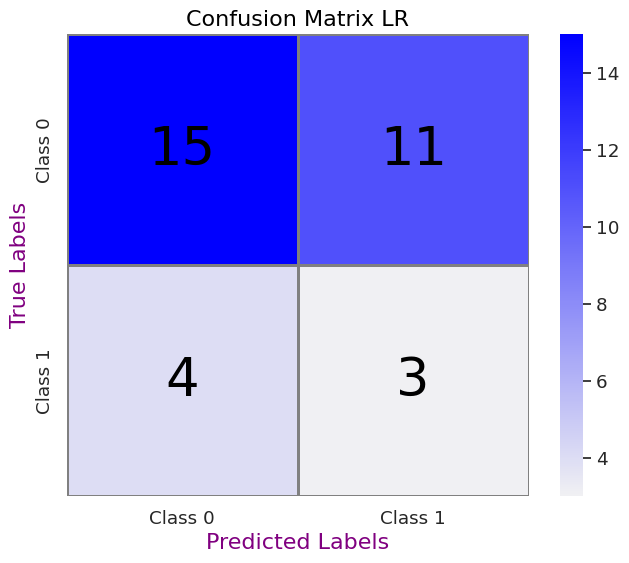

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
y_true = y_test  # Where y_test are the true labels of your test set
y_pred = y_pred_svc

# Obtain the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Custom colors
cmap = sns.light_palette("blue", as_cmap=True)

# Create a heat map with Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajusta el tamaño de la fuente

# Adjusts font size and other text attributes within the matrix
annot_kws = {"size": 38, "color": "black"}

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True, square=True,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'], linewidths=1, linecolor='gray',
            annot_kws=annot_kws)  # Apply the settings of annot_kws

plt.xlabel('Predicted Labels', fontsize=16, color='purple')
plt.ylabel('True Labels', fontsize=16, color='purple')
plt.title('Confusion Matrix LR', fontsize=16, color='black')

plt.show()

plt.savefig("Matriz de Confusión RL.tiff", format='tiff', dpi=600)
plt.close()

# Download images
files.download("Matriz de Confusión RL.tiff")



In [51]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Split of data
x_train, x_test, y_train, y_test = train_test_split(datos_pca, Y1_code.values.ravel(), train_size=0.8, random_state=206, shuffle=True)

# Creation of the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=206)  # Adjust hyperparameters as needed
random_forest_model.fit(x_train, y_train)
y_pred_rf = random_forest_model.predict(x_test)

# Calculate the accuracy
ex_rf = accuracy_score(y_true=y_test, y_pred=y_pred_rf, normalize=True)

print("Precisión de Random Forest:", ex_rf)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Matriz de Confusión:")
print(conf_matrix)

# Print the classification report
class_report = classification_report(y_test, y_pred_rf)
print("Informe de Clasificación:")
print(class_report)



Precisión de Random Forest: 0.7575757575757576
Matriz de Confusión:
[[19  2]
 [ 6  6]]
Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.76      0.90      0.83        21
         1.0       0.75      0.50      0.60        12

    accuracy                           0.76        33
   macro avg       0.76      0.70      0.71        33
weighted avg       0.76      0.76      0.74        33



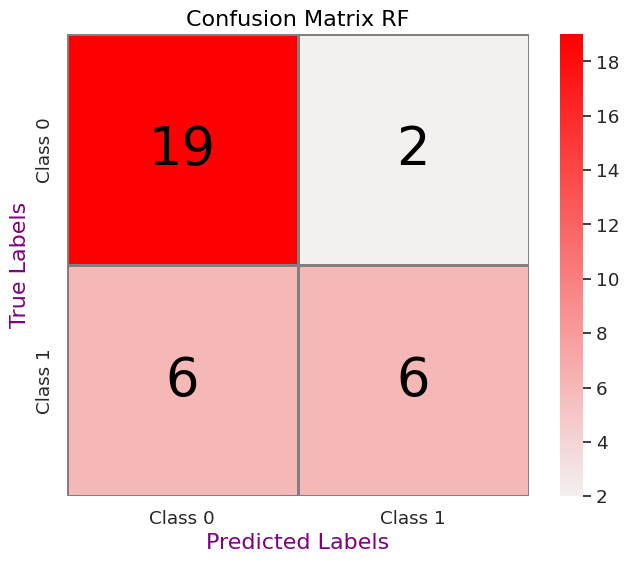

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [54]:
y_true = y_test  # Where y_test are the true labels of your test set
y_pred = y_pred_rf

# Obtain the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Custom colors
cmap = sns.light_palette("red", as_cmap=True)

# Create a heat map with Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjusts font size

# Adjusts font size and other text attributes within the matrix
annot_kws = {"size": 38, "color": "black"}

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True, square=True,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'], linewidths=1, linecolor='gray',
            annot_kws=annot_kws)  # Apply the settings of annot_kws

plt.xlabel('Predicted Labels', fontsize=16, color='purple')
plt.ylabel('True Labels', fontsize=16, color='purple')
plt.title('Confusion Matrix RF', fontsize=16, color='black')


plt.show()

plt.savefig("Matriz de Confusión RF.tiff", format='tiff', dpi=600)
plt.close()

# Download images
files.download("Matriz de Confusión RF.tiff")

In [55]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def opt_xgboost(X, y, x_test, rs):
    classifier = XGBClassifier(random_state=rs)  # Adjust hyperparameters as needed
    classifier.fit(X, y)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred, normalize=True)

    return (y_pred, accuracy)

exs_xgboost = []
yps_xgboost = []
rss = np.arange(1515, 2515)

for rs in rss:
    x_train, x_test, y_train, y_test = train_test_split(datos_pca, Y1_code.values.ravel(), train_size=0.8, random_state=rs, shuffle=True)

    # XGBoost
    y_pred_xgboost, ex_xgboost = opt_xgboost(x_train, y_train, x_test, rs)
    yps_xgboost.append(y_pred_xgboost)
    exs_xgboost.append(ex_xgboost)

max_accuracy_xgboost = max(exs_xgboost)
rs_max_xgboost = rss[exs_xgboost.index(max_accuracy_xgboost)]
print("XGBoost - Mejor precisión:", max_accuracy_xgboost, "con random_state:", rs_max_xgboost)


XGBoost - Mejor precisión: 0.7272727272727273 con random_state: 1568


In [56]:
from xgboost import XGBClassifier
x_train, x_test, y_train, y_test = train_test_split(datos_pca, Y1_code.values.ravel(), train_size=0.8, random_state=100, shuffle=True)

# Creation of the XGBoost model
xgboost_model = XGBClassifier(random_state=100)
xgboost_model.fit(x_train, y_train)
y_pred_xgboost = xgboost_model.predict(x_test)

# Calculate the accuracy
ex_xgboost = accuracy_score(y_true=y_test, y_pred=y_pred_xgboost, normalize=True)

print("Precisión de XGBoost:", ex_xgboost)

# Calculate the confusion matrix
conf_matrix_xgboost = confusion_matrix(y_test, y_pred_xgboost)
print("Matriz de Confusión:")
print(conf_matrix_xgboost)

# Print the classification report
class_report_xgboost = classification_report(y_test, y_pred_xgboost)
print("Informe de Clasificación:")
print(class_report_xgboost)

Precisión de XGBoost: 0.7878787878787878
Matriz de Confusión:
[[17  4]
 [ 3  9]]
Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83        21
         1.0       0.69      0.75      0.72        12

    accuracy                           0.79        33
   macro avg       0.77      0.78      0.77        33
weighted avg       0.79      0.79      0.79        33



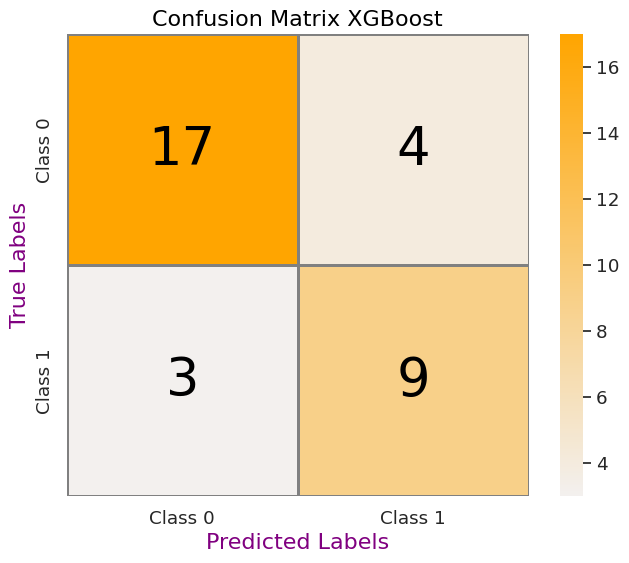

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
y_true = y_test  # Where y_test are the true labels of your test set
y_pred = y_pred_xgboost

# Obtain the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Custom colors
cmap = sns.light_palette("orange", as_cmap=True)

# Create a heat map with Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajusta el tamaño de la fuente

# Adjusts font size and other text attributes within the matrix
annot_kws = {"size": 38, "color": "black"}

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True, square=True,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'], linewidths=1, linecolor='gray',
            annot_kws=annot_kws)  # Apply the settings of annot_kws

plt.xlabel('Predicted Labels', fontsize=16, color='purple')
plt.ylabel('True Labels', fontsize=16, color='purple')
plt.title('Confusion Matrix XGBoost', fontsize=16, color='black')


plt.show()

plt.savefig("Matriz de Confusión XGBOOST.tiff", format='tiff', dpi=600)
plt.close()

# Download images
files.download("Matriz de Confusión XGBOOST.tiff")

<ipython-input-34-3997a2773b59>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=model_names, y=accuracies, palette="viridis")


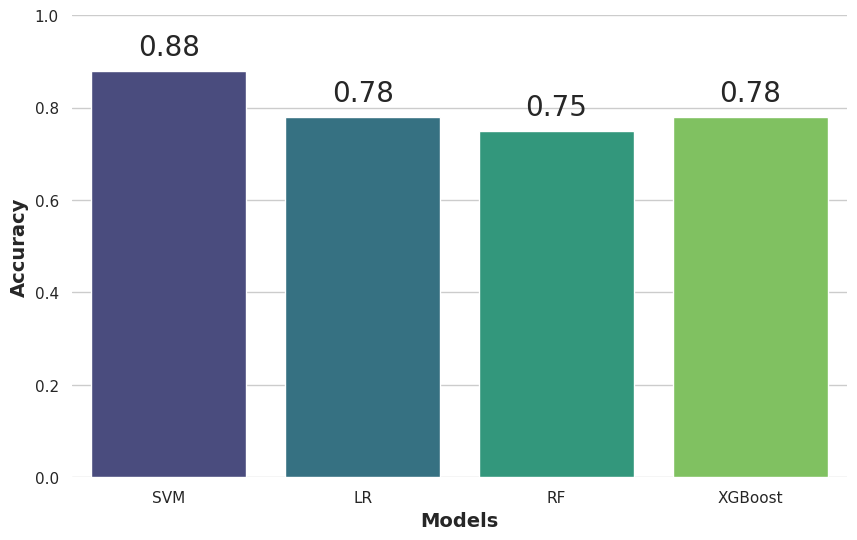

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

# Model accuracy
model_names = ['SVM', 'LR', 'RF', 'XGBoost']
accuracies = [0.88, 0.78, 0.75, 0.78]

# Set up a "seaborn" chart style
sns.set(style="whitegrid")

# Creating a bar chart with a different color scheme
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.xlabel('Models', fontweight='bold', fontsize=14)
plt.ylabel('Accuracy', fontweight='bold', fontsize=14)

plt.ylim(0, 1)  # Sets y-axis range between 0 and 1 (100%)

# Show the labels of the values in the bars
for bar, accuracy in zip(bars.patches, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, accuracy + 0.02, f'{accuracy:.2f}', ha='center', va='bottom', fontsize=20)

# Customize bar borders and colors
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()


In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics and model names
model_names = ['SVM', 'RL', 'RF', 'XGBOOST']
metrics = ['Precision', 'Recall', 'F1-Score']
class_labels = ['Controls', 'Cases']
colors = ['blue','gray']

# Values of metrics for each model and class
svm_values = {
    'Precision': [0.95, 0.79],
    'Recall': [0.86, 0.92],
    'F1-Score': [0.90, 0.85],
}

logistic_values = {
    'Precision': [0.79, 0.21],
    'Recall': [0.58, 0.43],
    'F1-Score': [0.67, 0.29],
}

rf_values = {
    'Precision': [0.76, 0.75],
    'Recall': [0.90, 0.50],
    'F1-Score': [0.83, 0.60],
}

xgboost_values = {
    'Precision': [0.82, 0.73],
    'Recall': [0.86, 0.67],
    'F1-Score': [0.84, 0.70],
}

all_values = [svm_values, logistic_values, rf_values, xgboost_values]

# Create three subplots for metrics in separate charts
fig, axs = plt.subplots(1, 3, figsize=(18, 5))


for i in range(3):
    metric_name = metrics[i]
    width = 0.2
    x = np.arange(len(model_names))

    for k, class_label in enumerate(class_labels):
        class_values = [model_values[metric_name][k] for model_values in all_values]
        axs[i].bar(x + k * width, class_values, width, label=f'{class_label}', color=colors[k])

    axs[i].set_xlabel('Model',fontweight='bold')
    axs[i].set_ylabel(metric_name,fontweight='bold')
    axs[i].set_title(f'{metric_name}',fontweight='bold')
    axs[i].set_xticks(x + width)
    axs[i].set_xticklabels(model_names,fontweight='bold')
    axs[i].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

plt.tight_layout()
plt.subplots_adjust(top=0.85)


plt.savefig("Metricas de evaluación.tiff", format='tiff', dpi=600)
plt.close()

# Download images
files.download("Metricas de evaluación.tiff")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

def opt_svc(X, y, xt, rs):

    # Definimos PLS y el número de componentes
    svc = SVC(C = 40, kernel = 'rbf', random_state=123)
    svc.fit(X, y)
    y_pred = svc.predict(x_test)
    # Calculamos métricas
    ex = accuracy_score(y_true = y_test, y_pred = y_pred, normalize = True)

    return (y_pred, ex)
# We tested with 30 components
exs = []
yps = []
rss = []
arr_rs = np.arange(13026, 13029)
#185192, 194048
for rs in arr_rs:
    x_train, x_test, y_train, y_test = train_test_split(x_scaled.T, Y1_code.values.ravel(), train_size   = 0.8, random_state = rs, shuffle = True)
    y_pred, ex = opt_svc(x_train, y_train, x_test, rs)
    rss.append(rs)
    yps.append(y_pred)
    exs.append(ex)
from sklearn.neural_network import MLPClassifier
x_train, x_test, y_train, y_test = train_test_split(x_scaled.T, Y1_code.values.ravel(), train_size   = 0.8, random_state = rss[np.argmax(exs)], shuffle = True)
# SVM model creation
svc1 = SVC(C = 40, kernel = 'rbf', random_state=13028)
svc1.fit(x_train, y_train)
y_pred_svc = svc1.predict(x_test)
ex_svc = accuracy_score(y_true = y_test, y_pred = y_pred_svc, normalize = True)
x_train, x_test, y_train, y_test = train_test_split(x_scaled.T, Y1_code.values.ravel(), train_size=0.8, random_state=rss[np.argmax(exs)], shuffle= True)
ann = MLPClassifier(hidden_layer_sizes=(20, 20), learning_rate_init=0.01, solver = 'lbfgs', max_iter = 5000, random_state = 23)
ann.fit(X=x_train, y=y_train)
y_pred = ann.predict(x_test)
score = ann.score(x_test, y_test)


Text(0, 0.5, 'Importance of the Feature')

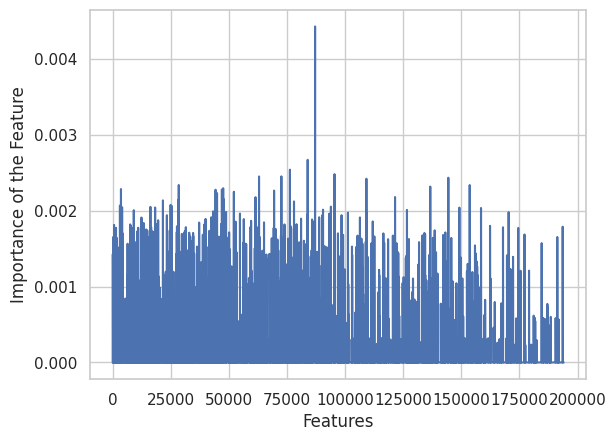

In [37]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
# Important variables in the model
v_imp = rfc.feature_importances_
plt.plot(v_imp)
plt.xlabel('Features')
plt.ylabel('Importance of the Feature')

Text(0, 0.5, 'Importance of the Feature')

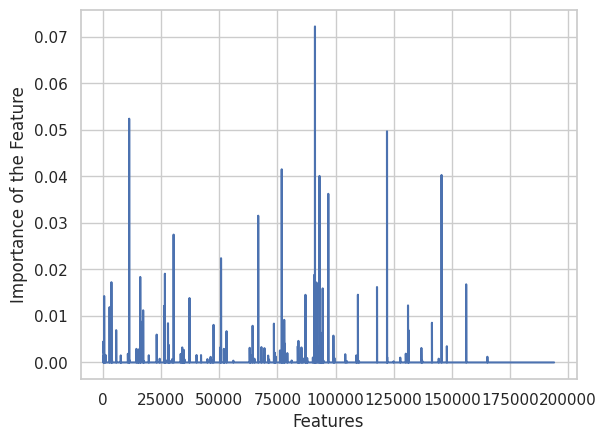

In [38]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train, y_train)
# most important variables of the model
v_imp = xgb.feature_importances_
plt.plot(v_imp)
plt.xlabel('Features')
plt.ylabel('Importance of the Feature')

In [39]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectFromModel(RandomForestClassifier(n_estimators=586), max_features=5000)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs


X_train_fs, X_test_fs, fs = select_features(x_train, y_train, x_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)

In [40]:
X_train_fs.shape
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

# define the model
knc = KNeighborsClassifier()
# fit the model
knc.fit(X_train_fs, y_train)
knc.score(X_test_fs, y_test)

0.5757575757575758

In [41]:
from sklearn.neural_network import MLPClassifier
#x_train, x_test, y_train, y_test = train_test_split(x_scaled.T, Y1_code.values.ravel(), train_size=0.8, random_state=rss[np.argmax(exs)], shuffle= True)
ann = MLPClassifier(hidden_layer_sizes=(20, 20), learning_rate_init=0.01, solver = 'lbfgs', max_iter = 5000, random_state = 123)
ann.fit(X_train_fs, y_train)
ann.score(X_test_fs, y_test)

0.7272727272727273

In [42]:
svc1 = SVC(C = 40, kernel = 'rbf', random_state=13028)
svc1.fit(X_train_fs, y_train)
svc1.score(X_test_fs, y_test)

0.7272727272727273

In [43]:
results = permutation_importance(ann, X_train_fs, y_train, scoring='accuracy')

In [45]:
from google.colab import files
plt.plot(results.importances_mean)
plt.xlabel('Relative abundance')
plt.ylabel('Importance of relative abundance')

plt.savefig("caracteristicas mas importantes.tiff", format='tiff', dpi=600)
plt.close()

# Download images
files.download("caracteristicas mas importantes.tiff")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

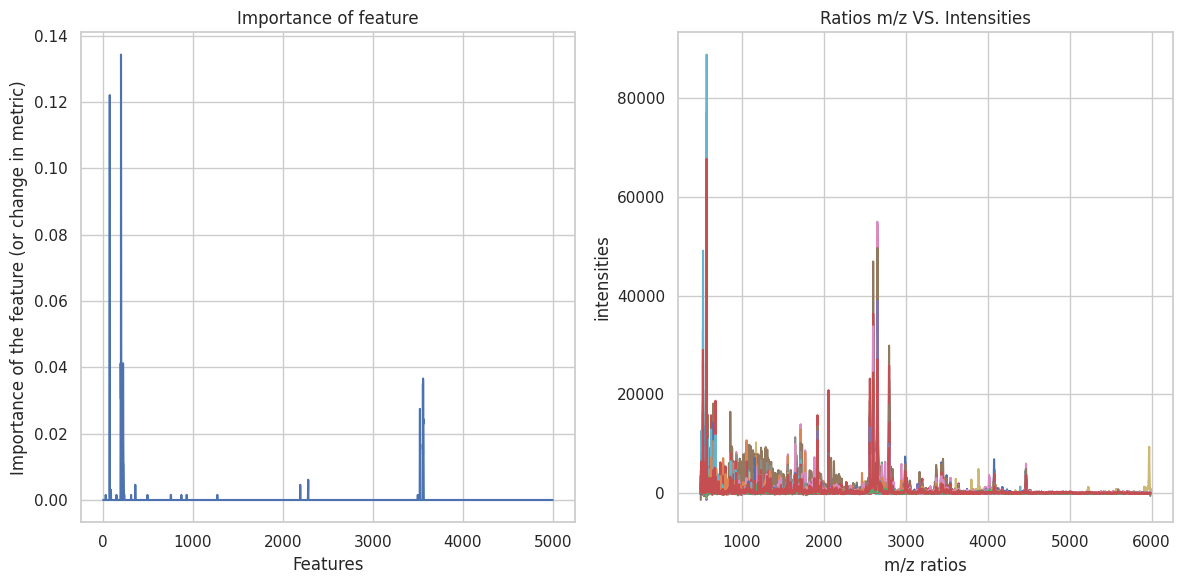

In [47]:
import matplotlib.pyplot as plt

# Characteristics importance chart
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Create a subplot of 1 row and 2 columns, and select the first subplot.
plt.plot(results.importances_mean)
plt.xlabel('Features')
plt.ylabel('Importance of the feature (or change in metric)')
plt.title('Importance of feature')

# Graph of m/z ratios vs. intensities
plt.subplot(1, 2, 2)  # Select the second subplot
plt.plot(Dsna, Dataint, linestyle='-')
plt.xlabel('m/z ratios')
plt.ylabel('intensities')
plt.title('Ratios m/z VS. Intensities')
plt.grid(True)

# Adjusts the spacing between subplots
plt.tight_layout()

# Show the figure with the two graphs superimposed on each other.
plt.show()